In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data '
data = pd.read_csv(url, header=None, na_values='?')


In [3]:
data.shape


(690, 16)

In [4]:
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [5]:
data.tail()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,-


In [6]:
data.columns = ['A' + str(i) for i in range(1, 16)] + ['class']
data.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [7]:
data.describe()


,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [8]:
categorical_columns = [c for c in data.columns if data[c].dtype.name ==
                       'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name !=
                     'object']
print(categorical_columns)
print(numerical_columns)


['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'class']
['A2', 'A3', 'A8', 'A11', 'A14', 'A15']


In [9]:
data[categorical_columns].describe()


,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [10]:
data[numerical_columns].describe()


,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [12]:
for c in categorical_columns:
    print(data[c].unique())


['b' 'a' nan]
['u' 'y' nan 'l']
['g' 'p' nan 'gg']
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
['t' 'f']
['t' 'f']
['f' 't']
['g' 's' 'p']
['+' '-']


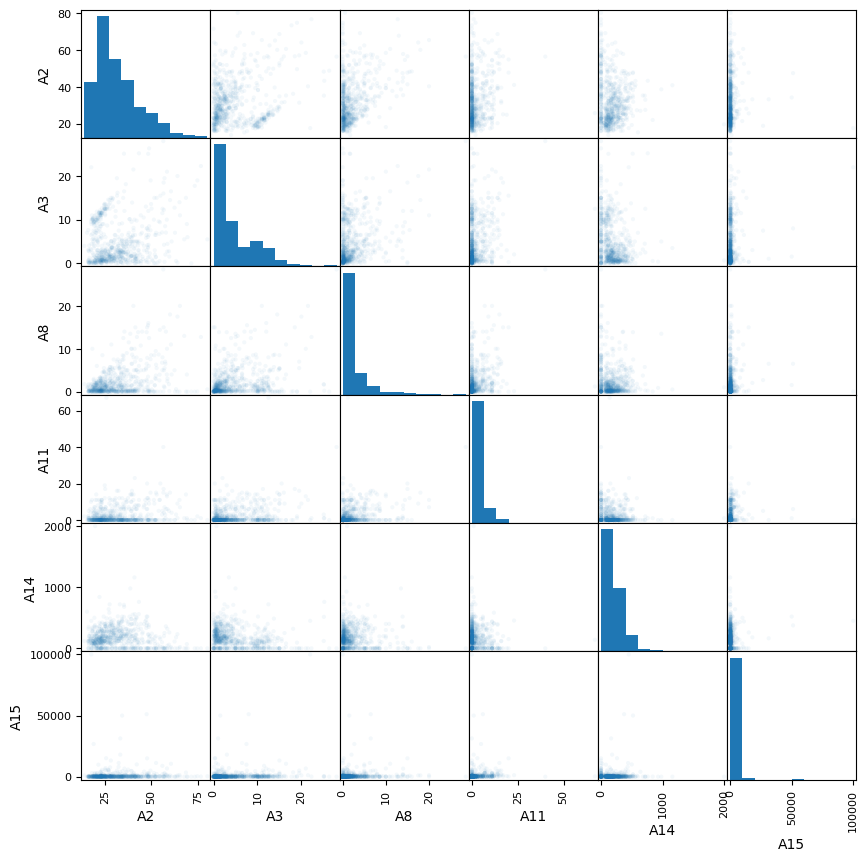

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(10, 10))


In [17]:
data.corr()


/tmp/ipykernel_4201/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,A2,A3,A8,A11,A14,A15
A2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
A3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
A8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
A11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
A14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
A15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


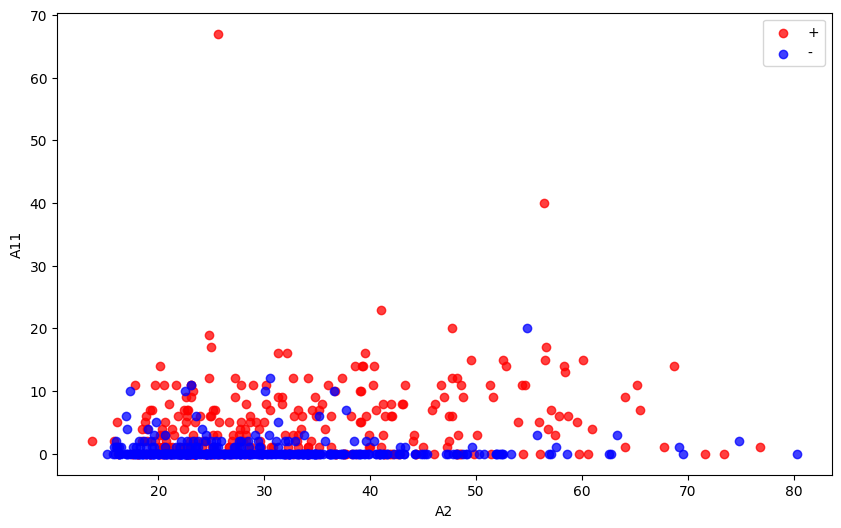

In [18]:
col1 = 'A2'
col2 = 'A11'
plt.figure(figsize=(10, 6))
plt.scatter(data[col1][data['class'] == '+'],
            data[col2][data['class'] == '+'],
            alpha=0.75,
            color='red',
            label='+')
plt.scatter(data[col1][data['class'] == '-'],
            data[col2][data['class'] == '-'],
            alpha=0.75,
            color='blue',
            label='-')
plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best')
